In [33]:
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)


Python version
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=8, micro=18, releaselevel='final', serial=0)


In [34]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.13.0


In [35]:
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical


In [36]:
import os
os.chdir("C:\\Users\\Ryzen\\OneDrive\\Desktop\\minor\\Dataset\\Dataset")

In [37]:
data = pd.read_csv("data.csv")

In [38]:
data.head(n=6)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [39]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


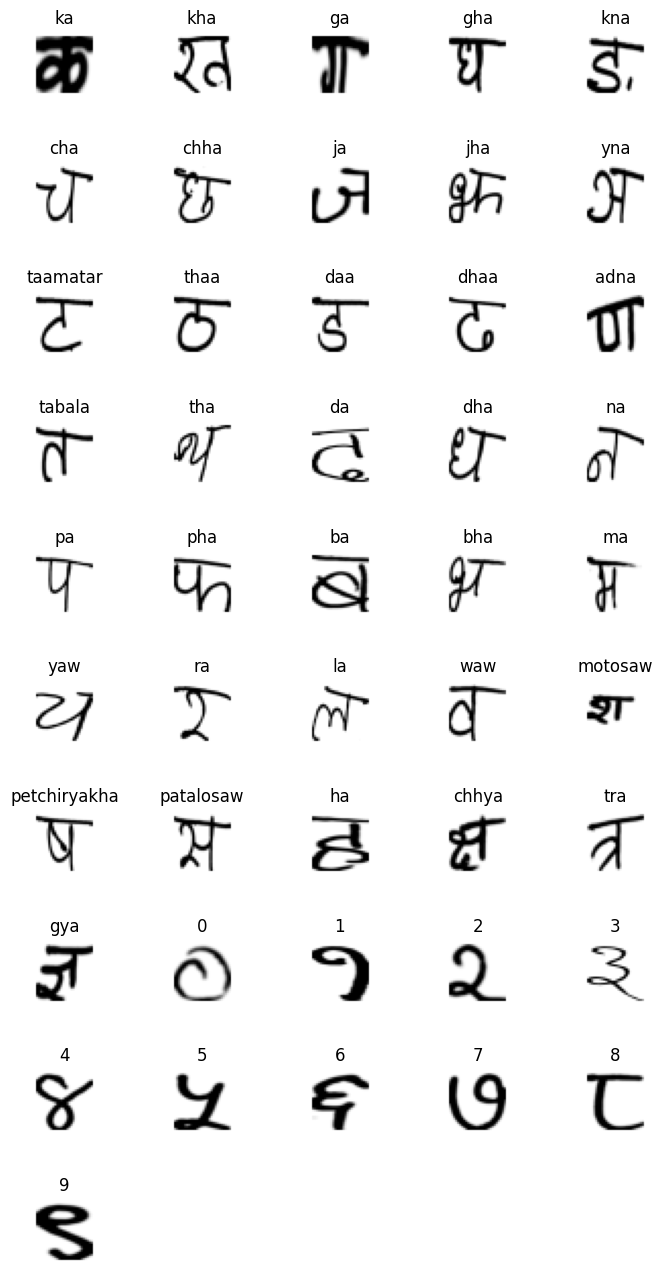

In [40]:
char_names = data.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

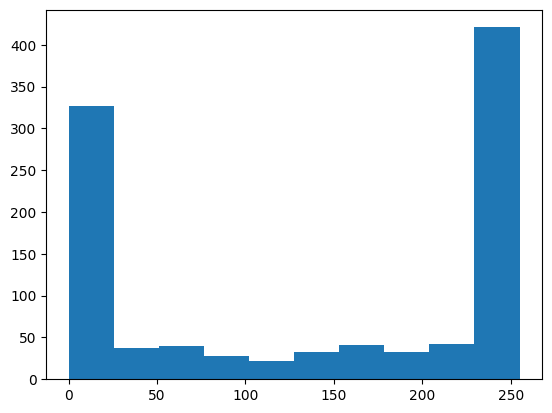

In [41]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[0,:-1])
plt.show()

In [42]:
X = data.values[:, :-1].astype('float32') / 255.0
Y = data["character"].values


In [43]:
del data
n_classes = 46

In [44]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [46]:
img_height_rows = 32
img_width_cols = 32

In [47]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [48]:
cnn = Sequential()

In [49]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [50]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)


In [51]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [52]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)


In [53]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [54]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [55]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [56]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [57]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [58]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))


Epoch 1/10
2013/2013 [==============================] - 85s 42ms/step - loss: 0.6970 - accuracy: 0.7960 - val_loss: 0.2443 - val_accuracy: 0.9258
Epoch 2/10
2013/2013 [==============================] - 84s 42ms/step - loss: 0.1883 - accuracy: 0.9417 - val_loss: 0.1373 - val_accuracy: 0.9596
Epoch 3/10
2013/2013 [==============================] - 83s 41ms/step - loss: 0.1232 - accuracy: 0.9616 - val_loss: 0.1237 - val_accuracy: 0.9636
Epoch 4/10
2013/2013 [==============================] - 83s 41ms/step - loss: 0.0921 - accuracy: 0.9712 - val_loss: 0.1031 - val_accuracy: 0.9711
Epoch 5/10
2013/2013 [==============================] - 83s 41ms/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.0812 - val_accuracy: 0.9778
Epoch 6/10
2013/2013 [==============================] - 83s 41ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.1043 - val_accuracy: 0.9715
Epoch 7/10
2013/2013 [==============================] - 83s 41ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0752 -

In [59]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.16%


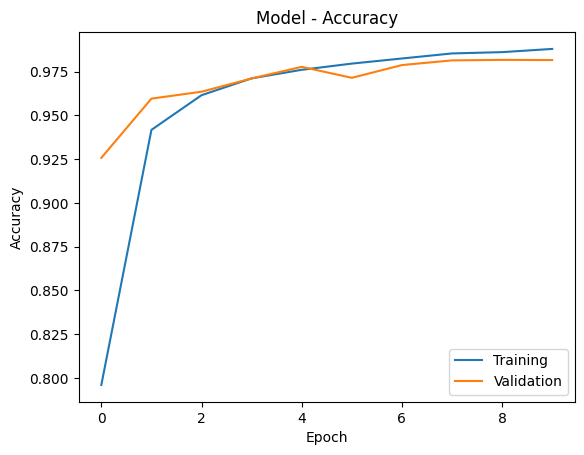

In [62]:
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


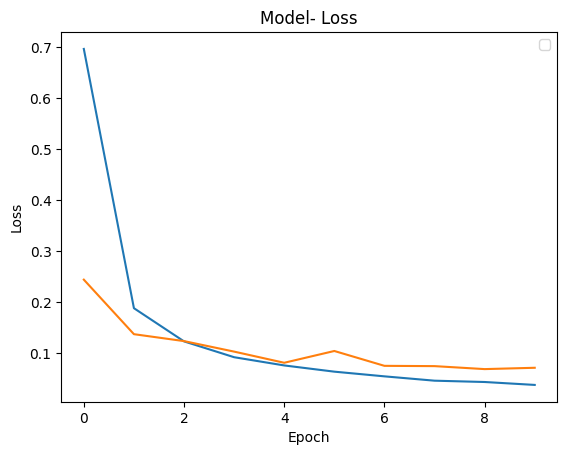

In [63]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [67]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = cnn.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


863/863 [==============================] - 6s 7ms/step
Accuracy: 98.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       605
           1       1.00      0.98      0.99       591
           2       0.98      1.00      0.99       567
           3       0.96      0.98      0.97       603
           4       0.99      0.96      0.98       618
           5       0.96      1.00      0.98       598
           6       0.99      0.97      0.98       566
           7       0.98      0.99      0.99       601
           8       0.99      0.99      0.99       594
           9       0.98      0.99      0.99       570
          10       0.98      0.97      0.97       621
          11       0.98      0.99      0.98       567
          12       0.96      0.99      0.97       605
          13       0.96      0.97      0.96       571
          14       0.99      1.00      1.00       598
          15       0.97      0.99      0

In [76]:
# Save the model architecture to a JSON file
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
cnn.save_weights("model.h5")

print("Model has been saved.")


Model has been saved.


In [3]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Ryzen


In [7]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(r'C:\Users\Ryzen', current_dir)

# Change the working directory
new_dir = r'C:\Users\Ryzen\OneDrive\Desktop\minor\Dataset\Dataset'
os.chdir(new_dir)

# Verify the change
updated_dir = os.getcwd()
print("Updated Working Directory:", updated_dir)


C:\Users\Ryzen C:\Users\Ryzen
Updated Working Directory: C:\Users\Ryzen\OneDrive\Desktop\minor\Dataset\Dataset


In [8]:
from keras.models import model_from_json

# Load the model architecture from JSON file
model_path = "model.json"
with open(model_path, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

# Load the weights into the model
loaded_model.load_weights("model.h5")

print("Model loaded successfully.")


Model loaded successfully.


In [13]:
from keras.models import model_from_json
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np

# Load the model architecture from JSON file
model_path = "model.json"
with open(model_path, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

# Load the weights into the model
loaded_model.load_weights("model.h5")

# Load the sample image
sample_image_path = 'D:/Downloads/Downloads/Devanagari-Character-Recognition-master/Devanagari-Character-Recognition-master/Sample Images/1345.png'  # Replace with the actual path
img = image.load_img(sample_image_path, color_mode="grayscale", target_size=(32, 32,1))  # Convert to grayscale
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Make prediction
prediction = loaded_model.predict(img_array)

# Convert prediction to class label
predicted_class = np.argmax(prediction)

class_mapping = {
    0: 'क',
    1: 'ख',
    2: 'ग',
    3: 'घ',
    4: 'ङ',
    5: 'च',
    6: 'छ',
    7: 'ज',
    8: 'झ',
    9: 'ञ',
    10: 'ट',
    11: 'ठ',
    12: 'ड',
    13: 'ढ',
    14: 'ण',
    15: 'त',
    16: 'थ',
    17: 'द',
    18: 'ध',
    19: 'न',
    20: 'प',
    21: 'फ',
    22: 'ब',
    23: 'भ',
    24: 'म',
    25: 'य',
    26: 'र',
    27: 'ल',
    28: 'व',
    29: 'श',
    30: 'ष',
    31: 'स',
    32: 'ह',
    33: 'क्ष',
    34: 'त्र',
    35: 'ज्ञ',
    36: '०',
    37: '१',
    38: '२',
    39: '३',
    40: '४',
    41: '५',
    42: '६',
    43: '७',
    44: '८',
    45: '९',
}

# Assuming predicted_class is the class index obtained from the model prediction
predicted_character = class_mapping[predicted_class]

print(f"Predicted Character: {predicted_character}")


1/1 [==============================] - 0s 51ms/step
Predicted Character: क
